In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### CLIP Global Steps & GT Reward

In [75]:
#load global step csv to convert from update number to steps
clip_step_csv = pd.read_csv("csv/all_CLIP_global_step.csv")
print(len(clip_step_csv))
# print(len(clip_step_csv.columns)) # num backbones (3) x num reward_funcs (3) x num seeds (2) x csv cols (3) + 1 (step col) = 55
# print(clip_step_csv.columns)
clip_step_csv.head()

1829
55


,Step,CartPole_laion400m_s13b_b51k_contrastive_20240425_053236 - global_step,CartPole_laion400m_s13b_b51k_contrastive_20240425_053236 - global_step__MIN,CartPole_laion400m_s13b_b51k_contrastive_20240425_053236 - global_step__MAX,CartPole_laion2b_s34b_b79k_contrastive_20240425_052240 - global_step,CartPole_laion2b_s34b_b79k_contrastive_20240425_052240 - global_step__MIN,CartPole_laion2b_s34b_b79k_contrastive_20240425_052240 - global_step__MAX,CartPole_laion2b_s34b_b79k_goal_baseline_reg_20240425_051828 - global_step,CartPole_laion2b_s34b_b79k_goal_baseline_reg_20240425_051828 - global_step__MIN,CartPole_laion2b_s34b_b79k_goal_baseline_reg_20240425_051828 - global_step__MAX,...,CartPole_CLIPConvNext_goal_baseline_1.0_reg_20240422_124730 - global_step__MAX,CartPole_CLIPConvNext_cosine_20240422_093220 - global_step,CartPole_CLIPConvNext_cosine_20240422_093220 - global_step__MIN,CartPole_CLIPConvNext_cosine_20240422_093220 - global_step__MAX,CartPole_3mill_CLIP_1.0alpha_goal_baseline_reg_20240421_084411 - global_step,CartPole_3mill_CLIP_1.0alpha_goal_baseline_reg_20240421_084411 - global_step__MIN,CartPole_3mill_CLIP_1.0alpha_goal_baseline_reg_20240421_084411 - global_step__MAX,CartPole_3mill_CLIP_cosine_20240420_091709 - global_step,CartPole_3mill_CLIP_cosine_20240420_091709 - global_step__MIN,CartPole_3mill_CLIP_cosine_20240420_091709 - global_step__MAX
0,0,75200,75200,75200,75200,75200,75200,75200,75200,75200,...,76800.0,76800.0,76800.0,76800.0,76800.0,76800.0,76800.0,76800.0,76800.0,76800.0
1,1,76800,76800,76800,76800,76800,76800,76800,76800,76800,...,80000.0,80000.0,80000.0,80000.0,80000.0,80000.0,80000.0,80000.0,80000.0,80000.0
2,2,78400,78400,78400,78400,78400,78400,78400,78400,78400,...,83200.0,83200.0,83200.0,83200.0,83200.0,83200.0,83200.0,83200.0,83200.0,83200.0
3,3,80000,80000,80000,80000,80000,80000,80000,80000,80000,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0
4,4,81600,81600,81600,81600,81600,81600,81600,81600,81600,...,89600.0,89600.0,89600.0,89600.0,89600.0,89600.0,89600.0,89600.0,89600.0,89600.0


In [37]:
#load in reward csv
clip_reward_csv = pd.read_csv("csv/all_CLIP_ep_gt_rew_mean.csv")
print(len(clip_reward_csv))
# print(len(clip_reward_csv.columns))
# print(clip_reward_csv.columns)
clip_reward_csv.head()

1829
55


,Step,CartPole_laion400m_s13b_b51k_contrastive_20240425_053236 - rollout/ep_gt_rew_mean,CartPole_laion400m_s13b_b51k_contrastive_20240425_053236 - rollout/ep_gt_rew_mean__MIN,CartPole_laion400m_s13b_b51k_contrastive_20240425_053236 - rollout/ep_gt_rew_mean__MAX,CartPole_laion2b_s34b_b79k_contrastive_20240425_052240 - rollout/ep_gt_rew_mean,CartPole_laion2b_s34b_b79k_contrastive_20240425_052240 - rollout/ep_gt_rew_mean__MIN,CartPole_laion2b_s34b_b79k_contrastive_20240425_052240 - rollout/ep_gt_rew_mean__MAX,CartPole_laion2b_s34b_b79k_goal_baseline_reg_20240425_051828 - rollout/ep_gt_rew_mean,CartPole_laion2b_s34b_b79k_goal_baseline_reg_20240425_051828 - rollout/ep_gt_rew_mean__MIN,CartPole_laion2b_s34b_b79k_goal_baseline_reg_20240425_051828 - rollout/ep_gt_rew_mean__MAX,...,CartPole_CLIPConvNext_goal_baseline_1.0_reg_20240422_124730 - rollout/ep_gt_rew_mean__MAX,CartPole_CLIPConvNext_cosine_20240422_093220 - rollout/ep_gt_rew_mean,CartPole_CLIPConvNext_cosine_20240422_093220 - rollout/ep_gt_rew_mean__MIN,CartPole_CLIPConvNext_cosine_20240422_093220 - rollout/ep_gt_rew_mean__MAX,CartPole_3mill_CLIP_1.0alpha_goal_baseline_reg_20240421_084411 - rollout/ep_gt_rew_mean,CartPole_3mill_CLIP_1.0alpha_goal_baseline_reg_20240421_084411 - rollout/ep_gt_rew_mean__MIN,CartPole_3mill_CLIP_1.0alpha_goal_baseline_reg_20240421_084411 - rollout/ep_gt_rew_mean__MAX,CartPole_3mill_CLIP_cosine_20240420_091709 - rollout/ep_gt_rew_mean,CartPole_3mill_CLIP_cosine_20240420_091709 - rollout/ep_gt_rew_mean__MIN,CartPole_3mill_CLIP_cosine_20240420_091709 - rollout/ep_gt_rew_mean__MAX
0,0,31.747341,31.747341,31.747341,31.747341,31.747341,31.747341,31.747341,31.747341,31.747341,...,29.169271,29.169271,29.169271,29.169271,29.169271,29.169271,29.169271,29.169271,29.169271,29.169271
1,1,31.468084,31.468084,31.468084,31.468084,31.468084,31.468084,31.747341,31.747341,31.747341,...,29.416666,29.479166,29.479166,29.479166,29.268229,29.268229,29.268229,29.398438,29.398438,29.398438
2,2,31.710106,31.710106,31.710106,31.539894,31.539894,31.539894,31.859043,31.859043,31.859043,...,29.395834,29.460938,29.460938,29.460938,29.341146,29.341146,29.341146,29.611979,29.611979,29.611979
3,3,31.273935,31.273935,31.273935,31.170214,31.170214,31.170214,31.324469,31.324469,31.324469,...,29.760416,29.533854,29.533854,29.533854,29.184896,29.184896,29.184896,29.682291,29.682291,29.682291
4,4,30.888298,30.888298,30.888298,30.808510,30.808510,30.808510,30.986702,30.986702,30.986702,...,30.010416,29.822916,29.822916,29.822916,29.502604,29.502604,29.502604,29.986979,29.986979,29.986979


#### Env Reward Global Step & Reward

In [5]:
#load global step csv to convert from update number to steps
gt_step_csv = pd.read_csv("csv/cartpole_gt_global_step.csv")
print(len(gt_step_csv))
gt_step_csv.head()

468


,Step,CartPole_env_reward_20240422_232316 - global_step,CartPole_env_reward_20240422_232316 - global_step__MIN,CartPole_env_reward_20240422_232316 - global_step__MAX
0,0,6400,6400,6400
1,1,12800,12800,12800
2,2,19200,19200,19200
3,3,25600,25600,25600
4,4,32000,32000,32000


In [6]:
#load in reward csv
gt_reward_csv = pd.read_csv("csv/cartpole_gt_ep_rew_mean.csv")
print(len(gt_reward_csv))
gt_reward_csv.head()

468


,Step,CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean,CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean__MIN,CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean__MAX
0,0,31.812500,31.812500,31.812500
1,1,30.734375,30.734375,30.734375
2,2,31.572916,31.572916,31.572916
3,3,30.790001,30.790001,30.790001
4,4,30.250000,30.250000,30.250000


### Plotting

In [38]:
# convert step col to global step 
clip_reward_csv["Step"] = clip_step_csv[clip_step_csv.columns[1]]
gt_reward_csv["Step"] = gt_step_csv[gt_step_csv.columns[1]]

In [39]:
# renaming CLIP runs to have: backbone, reward func
def rename_clip(name):
    if "Step" in name:
        return name
    # getting backbone
    elif "laion2b" in name or "CLIPViT" in name or "3mill" in name:
        backbone = "ViT"
    elif "laion400m" in name or "CLIPConvNext" in name:
        backbone = "ConvNext"
    elif "CLIPRN" in name or "openai" in name:
        backbone = "ResNet"
    # getting reward func
    if "cosine" in name:
        r = "cosine"
    elif "contrastive" in name:
        r = "contrastive"
    elif "goal_baseline" in name:
        r = "goal_baseline_reg"
    else:
        print(name)
        
    stat = name.split('/')[-1]
    return f"{backbone}_{r}_{stat}"

clip_reward_csv = clip_reward_csv.rename(columns=rename_clip)

# removing MAX and MIN cols
clip_reward_csv.drop([col for col in clip_reward_csv.columns if 'MAX' in col],axis=1,inplace=True)
clip_reward_csv.drop([col for col in clip_reward_csv.columns if 'MIN' in col],axis=1,inplace=True)
print(clip_reward_csv.columns)

Index(['Step', 'ConvNext_contrastive_ep_gt_rew_mean',
       'ViT_contrastive_ep_gt_rew_mean',
       'ViT_goal_baseline_reg_ep_gt_rew_mean', 'ViT_cosine_ep_gt_rew_mean',
       'ConvNext_goal_baseline_reg_ep_gt_rew_mean',
       'ConvNext_cosine_ep_gt_rew_mean', 'ResNet_contrastive_ep_gt_rew_mean',
       'ResNet_goal_baseline_reg_ep_gt_rew_mean',
       'ResNet_cosine_ep_gt_rew_mean', 'ConvNext_contrastive_ep_gt_rew_mean',
       'ResNet_cosine_ep_gt_rew_mean', 'ViT_contrastive_ep_gt_rew_mean',
       'ResNet_contrastive_ep_gt_rew_mean',
       'ResNet_goal_baseline_reg_ep_gt_rew_mean',
       'ConvNext_goal_baseline_reg_ep_gt_rew_mean',
       'ConvNext_cosine_ep_gt_rew_mean',
       'ViT_goal_baseline_reg_ep_gt_rew_mean', 'ViT_cosine_ep_gt_rew_mean'],
      dtype='object')


In [46]:
def moving_window_average(data, window_size):
    """Smooth data with moving window average."""
    if window_size <= 1:
        return data
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'same')

In [87]:
# given a reward function and all the data, plot one line for each reward function
def plot(df, reward_func):
    df = df.interpolate(method='linear')
    # Define smooth factor (window size), where the window size is 2k+1
    smooth_factor = 1
    backbones = ["ViT", "ConvNext", "ResNet"]
    plt.figure()

    for backbone in backbones:
        # calculate mean and std for every 2 seeds per backbone (they have same col name)
        col_name = f"{backbone}_{reward_func}_ep_gt_rew_mean"
        means = df[[col_name]].mean(axis=1)
        stds = df[[col_name]].std(axis=1)

        # Apply smoothing
        smoothed_means = moving_window_average(means, smooth_factor)

        # Plot means as main line
        if backbone == "ViT":
            if reward_func == "contrastive":
                x = clip_step_csv['CartPole_laion2b_s34b_b79k_contrastive_20240425_052240 - global_step']
            elif reward_func == "cosine":
                x = clip_step_csv['CartPole_laion2b_s34b_b79k_cosine_20240425_051521 - global_step']
            elif reward_func == "goal_baseline_reg":
                x = clip_step_csv['CartPole_laion2b_s34b_b79k_goal_baseline_reg_20240425_051828 - global_step']
        elif backbone == "ConvNext":
            if reward_func == "contrastive":
                x = clip_step_csv['CartPole_laion400m_s13b_b51k_contrastive_20240425_053236 - global_step']
            elif reward_func == "cosine":
                x = clip_step_csv['CartPole_laion400m_s13b_b51k_cosine_20240424_232218 - global_step']
            elif reward_func == "goal_baseline_reg":
                x = clip_step_csv['CartPole_laion400m_s13b_b51k_goal_baseline_reg_20240424_232731 - global_step']
        elif backbone == "ResNet":
            if reward_func == "contrastive":
                x = clip_step_csv['CartPole_openai_contrastive_20240424_231510 - global_step']
            elif reward_func == "cosine":
                x = clip_step_csv['CartPole_openai_cosine_20240424_201844 - global_step']
            elif reward_func == "goal_baseline_reg":
                x = clip_step_csv['CartPole_openai_goal_baseline_reg_20240424_230952 - global_step']
        plt.plot(x, smoothed_means, label=f'{backbone}_{reward_func}')
        # Fill between mean ± std
        plt.fill_between(x, smoothed_means-stds, smoothed_means+stds, alpha=0.2)

    # Plotting env reward
    # TODO: add in second run
    env_reward = gt_reward_csv["CartPole_env_reward_20240422_232316 - rollout/ep_rew_mean"]
    plt.plot(gt_reward_csv["Step"], env_reward, label="Enviornment Reward")
    
    # Labeling the plot
    plt.xlabel('Step')
    plt.ylabel('Score')
    plt.title(f'{reward_func} Scores with Standard Deviation')
    plt.legend()
    plt.show()

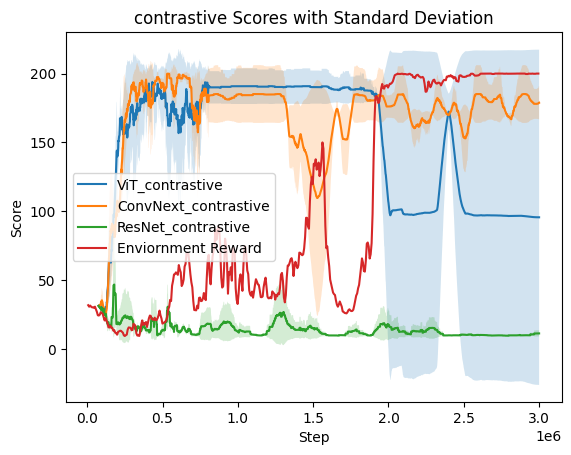

In [83]:
plot(clip_reward_csv, "contrastive")

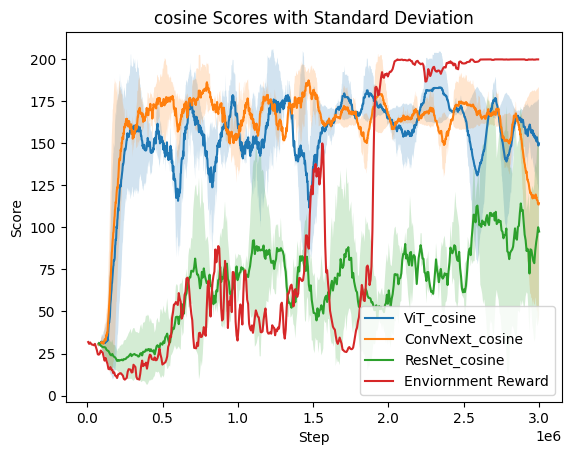

In [84]:
plot(clip_reward_csv, "cosine")

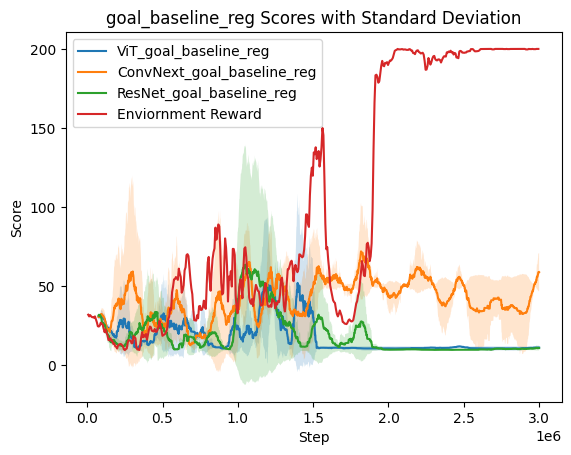

In [85]:
plot(clip_reward_csv, "goal_baseline_reg")